<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Some-References" data-toc-modified-id="Some-References-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Some References</a></span></li><li><span><a href="#Load-data-from-Keras" data-toc-modified-id="Load-data-from-Keras-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load data from Keras</a></span></li><li><span><a href="#Adjust-Dataset-for-Training" data-toc-modified-id="Adjust-Dataset-for-Training-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Adjust Dataset for Training</a></span></li><li><span><a href="#Build-the-Neural-Network" data-toc-modified-id="Build-the-Neural-Network-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Build the Neural Network</a></span></li><li><span><a href="#Compile-the-Model" data-toc-modified-id="Compile-the-Model-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Compile the Model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Train the model</a></span></li></ul></li><li><span><a href="#Building-an-Image-Classifier-Using-the-Sequential-API" data-toc-modified-id="Building-an-Image-Classifier-Using-the-Sequential-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Building an Image Classifier Using the Sequential API</a></span><ul class="toc-item"><li><span><a href="#Load-the-dataset-from-Keras" data-toc-modified-id="Load-the-dataset-from-Keras-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the dataset from Keras</a></span></li><li><span><a href="#Creating-the-model-using-the-Sequential-API" data-toc-modified-id="Creating-the-model-using-the-Sequential-API-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the model using the Sequential API</a></span></li><li><span><a href="#Compiling-the-model" data-toc-modified-id="Compiling-the-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compiling the model</a></span></li><li><span><a href="#Training-and-evaluating-the-model" data-toc-modified-id="Training-and-evaluating-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Training and evaluating the model</a></span></li><li><span><a href="#Using-the-model-to-make-predictions" data-toc-modified-id="Using-the-model-to-make-predictions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Using the model to make predictions</a></span></li></ul></li><li><span><a href="#Building-a-Regression-MLP-Using-the-Sequential-API" data-toc-modified-id="Building-a-Regression-MLP-Using-the-Sequential-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building a Regression MLP Using the Sequential API</a></span></li></ul></div>

# Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Some References
 - Keras: https://keras.io/getting_started/, also some tutorials here by Victor Zhou: https://victorzhou.com/series/keras-for-beginners/
 - Neural Network course by Andrej Karpathy: https://karpathy.ai/zero-to-hero.html
 

### Load data from Keras

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential

In [3]:
df = pd.read_excel('AAPL_Intraday_Data.xlsx')
df.head()

,Dates,Last Price,Bid Price,Ask Price,Bid-Ask Spread,Volume,Turnover
0,2024-05-01 09:30:00,170.000,169.94,170.05,0.11,704606.0,119685384.0
1,2024-05-01 09:31:00,169.770,169.98,170.05,0.07,194725.0,33083506.0
2,2024-05-01 09:32:00,169.620,169.98,170.07,0.09,110680.0,18798334.0
3,2024-05-01 09:33:00,169.350,169.98,170.07,0.09,203403.0,34494664.0
4,2024-05-01 09:34:00,169.115,170.00,169.80,-0.20,254573.0,43094548.0


In [4]:
#CHECK TO SEE IF THERE IS ANYTHING WRONG
#results show some NaT and NaN values
#should look into this when cleaning data
df.tail()

,Dates,Last Price,Bid Price,Ask Price,Bid-Ask Spread,Volume,Turnover
32090,NaT,NaN,NaN,207.27,207.27,NaN,NaN
32091,NaT,NaN,NaN,207.22,207.22,NaN,NaN
32092,NaT,NaN,NaN,207.22,207.22,NaN,NaN
32093,NaT,NaN,NaN,207.21,207.21,NaN,NaN
32094,NaT,NaN,NaN,207.30,207.30,NaN,NaN


In [5]:
#change the name of the columns for easier access/read
df.columns = [
    'DATES',
    'PRICE',
    'BID',
    'ASK',
    'SPREAD',
    'VOLUME',
    'TURNOVER'
]

In [6]:
Y = df['PRICE']
X = df[['BID','ASK','SPREAD','VOLUME','TURNOVER']]

data = pd.concat([Y,X],axis=1)

#use mean of stocks to fill NaN values
# Fill NaN values with the mean of the column
data_clean = data.dropna(subset = ['PRICE'])

#reassign X and Y to the new columns with no NaNs

Y = data_clean['PRICE']
X = data_clean[['BID','ASK','SPREAD','VOLUME','TURNOVER']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Each pixel intensity is also represented as a byte (0 to 255):

### Build the Neural Network

We will need to tell Keras the computation graph (aka the specific layout of the neural network) that you want to build.

In [7]:
from keras.layers import LSTM

In [9]:
X_train.shape

(11272, 5)

In [10]:
#figuring out X_train 3D model
X_train = X_train.reshape((11272, 1, 5))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [15]:
tf.random.set_seed(42)

model = Sequential([
    #FIX THIS
    LSTM(5, activation = 'tanh', input_shape = (11272,1)),
    Dense(1, activation = 'linear'),
]
)

### Compile the Model

Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called `sparse_categorical_crossentropy`. *Side note: Shape errors are quite common, especially when getting started,
so you should familiarize yourself with the error messages: try fitting a model with inputs and/or labels of the wrong
shape, and see the errors you get. Similarly, try compiling the model with loss="categorical_crossentropy" instead of loss="sparse_categorical_crossentropy". Or you can remove the Flatten layer.*

The optimizer helps determine how quickly the model learns, how resistant it is to getting "stuck" or "blowing up". "adam" is often a good choice.

In [12]:
from tensorflow_addons.metrics import RSquare
#from sklearn.metrics import r2_score
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = RSquare())

c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an is

In [42]:
X_train

,BID,ASK,SPREAD,VOLUME,TURNOVER
4894,182.54,182.30,-0.24,24158.0,4.585312e+06
10181,189.89,189.88,-0.01,269364.0,5.266673e+07
12852,192.38,192.54,0.16,173426.0,3.791868e+07
921,170.82,171.00,0.18,167034.0,3.084012e+07
5278,182.48,182.58,0.10,23994.0,4.587580e+06
...,...,...,...,...,...
3600,183.02,183.15,0.13,46159.0,8.609740e+06
8751,187.20,187.54,0.34,77894.0,1.510987e+07
6975,182.60,182.82,0.22,20754.0,3.950541e+06
11079,190.02,190.00,-0.02,914564.0,1.866714e+08


### Train the model

We can get close to 98\% accuracy with some initial parameters. If we did some additional work to tune parameters, we could gain higher than 98\% accuracy.

In [46]:
print(X_train.shape)
print(y_train.shape)

(11272, 5)
(11272,)


In [13]:
model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split = 0.2)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Augustine Jun\anaconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 11272, 1), found shape=(None, 5)


In [20]:
model.evaluate(X_test, y_test)

89/89 [==============================] - 0s 739us/step - loss: 5266.5825 - accuracy: 0.0000e+00


[5266.58251953125, 0.0]

In [24]:
x_forecast = np.array(df.drop(['Last Price'],1))[-1:]
print(x_forecast)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

**The examples below come directly from the HOML textbook for your reference.**


## Building an Image Classifier Using the Sequential API
### Load the dataset from Keras

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [15]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [16]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [17]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

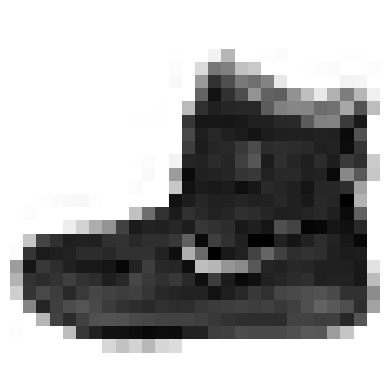

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [19]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [21]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

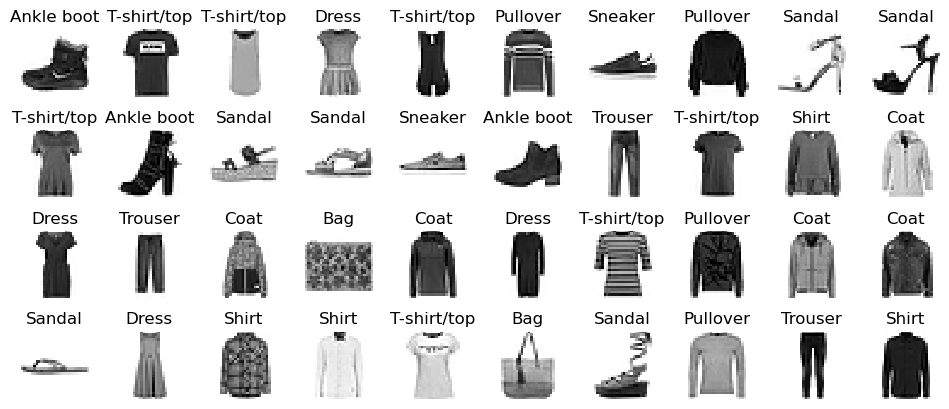

In [22]:
# HOML Figure 10–10
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the model using the Sequential API

In [23]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [24]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


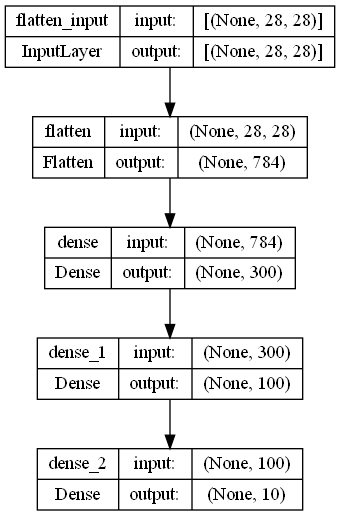

In [26]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [27]:
model.layers

In [28]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03433256, -0.05898801, -0.00844467, ..., -0.00770591,
         0.00568273,  0.01751418],
       [ 0.05025554,  0.04372264, -0.05282117, ...,  0.00810655,
        -0.06761134, -0.01791316],
       [ 0.03002524, -0.05072434, -0.02766071, ..., -0.00611651,
         0.04833688, -0.07113057],
       ...,
       [ 0.01387845, -0.00583359,  0.03470103, ..., -0.03994274,
        -0.0180674 ,  0.0229046 ],
       [ 0.0310336 , -0.06998582,  0.07089913, ...,  0.03820464,
         0.07302696,  0.05280662],
       [-0.04467012, -0.06756005,  0.03464219, ..., -0.02496073,
         0.06702435, -0.0605504 ]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

### Compiling the model

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [35]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [36]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [37]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

### Training and evaluating the model

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7108 - sparse_categorical_accuracy: 0.7643 - val_loss: 0.4995 - val_sparse_categorical_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4840 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.4610 - val_sparse_categorical_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4366 - sparse_categorical_accuracy: 0.8466 - val_loss: 0.4184 - val_sparse_categorical_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4113 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.3892 - val_sparse_categorical_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3899 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3853 - val_sparse_categorical_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3737 - spars

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


The plot below provides a learning curve on the accuracy (increasing curves with dot/star) and loss (decreasing curves).

The validation curves start to separrate as the iterations go on, which suggest there may be a bit of overfitting.

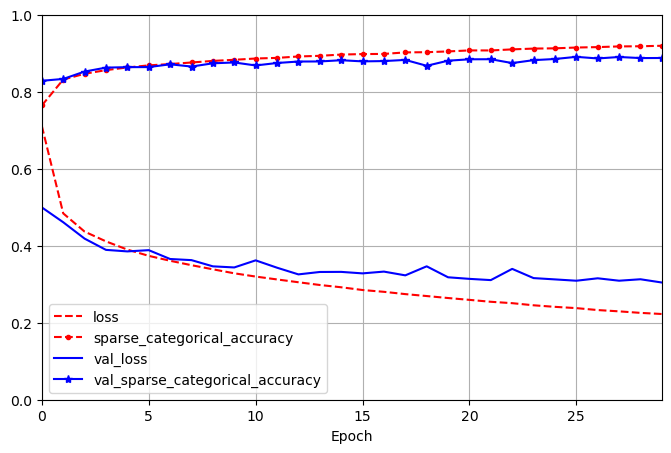

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

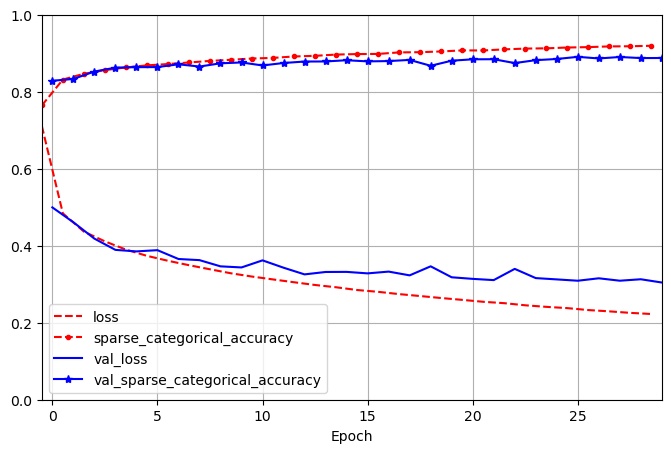

In [42]:
# extra code – shows how to shift the training curve by -1/2 epoch as the validation error is computed at the end of an epoch 
# while the training error is computed with a mean during each epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3236 - sparse_categorical_accuracy: 0.8846


[0.32355156540870667, 0.8845999836921692]

### Using the model to make predictions

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 87ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

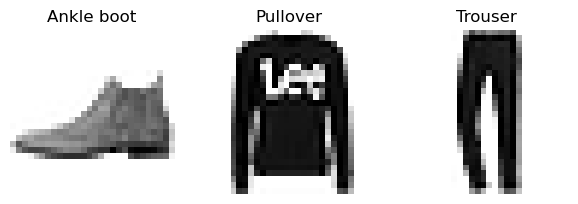

In [48]:
# HOML Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset:

In [49]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [50]:
tf.random.set_seed(42)
#do normalization on the training data
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
#apply normalization to the training data
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
#X_test will undergo the norm_layer, hence we can do the following:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9000 - root_mean_squared_error: 0.9487 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6692
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3884 - root_mean_squared_error: 0.6232 - val_loss: 0.6452 - val_root_mean_squared_error: 0.8032
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3574 - root_mean_squared_error: 0.5979 - val_loss: 0.8853 - val_root_mean_squared_error: 0.9409
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3522 - root_mean_squared_error: 0.5934 - val_loss: 0.7172 - val_root_mean_squared_error: 0.8469
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3383 - root_mean_squared_error: 0.5817 - val_loss: 1.4406 - val_root_mean_squared_error: 1.2002
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3309 - root_mean_squared_error: 0.5753 - val_loss: 1.3967 - val_

In [51]:
rmse_test

0.5343797206878662

In [52]:
y_pred

array([[0.5649936],
       [1.2399752],
       [5.0443215]], dtype=float32)